In [6]:
!pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c cifar-10

 98% 701M/715M [00:09<00:00, 76.1MB/s]
100% 715M/715M [00:09<00:00, 78.0MB/s]


In [9]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [10]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extract.')

The dataset is extract.


In [11]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [12]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.6 MB/s eta 0:00:00


In [13]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode = 'r')
archive.extractall()
archive.close()

In [14]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Import dependencies

In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split

In [16]:
filenames = os.listdir('/content/train')

In [17]:
type(filenames)

list

In [18]:
len(filenames)

50000

In [19]:
print(filenames[0:5])
print(filenames[-5:])

['5757.png', '47979.png', '45334.png', '16335.png', '28257.png']
['17726.png', '583.png', '2591.png', '41741.png', '16763.png']


Labels Processing

In [20]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [21]:
labels_df.shape

(50000, 2)

In [22]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [23]:
labels_df[labels_df['id'] == 5757]

,id,label
5756,5757,deer


In [24]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [25]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [26]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [27]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [28]:
labels_dictionary = {'airplane':0, 'automobile':1,'bird':2, 'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [29]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


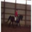

In [30]:
import cv2
from google.colab.patches import cv2_imshow
img =cv2.imread('/content/train/583.png')
cv2_imshow(img)

In [31]:
id_list = list(labels_df['id'])

In [32]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [33]:
#convert images into numpy array
train_data_folder = '/content/train/'
#  img_path = train_data_folder + str(id) +'.png'
#  print(img_path)
#  if id>=5:
#   break
data = []
for id in id_list:
    image = Image.open(train_data_folder + str(id) + '.png')
    image = np.array(image)
    data.append(image)

In [34]:
type(data)

list

In [35]:
type(data[0])

numpy.ndarray

In [36]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
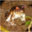

In [37]:
data[0]

In [39]:
#convert images list and labels list to numpy arrays
X= np.array(data)
Y=np.array(labels)

In [40]:
type(X)

numpy.ndarray

In [41]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [43]:
print(X.shape, X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [44]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [45]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

Building the Neural Network

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
num_of_classes =10

#setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [50]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [51]:
#training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 2.1653 - val_loss: 2.0594
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 2.0395 - val_loss: 1.9966
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 2.0006 - val_loss: 2.0341
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9810 - val_loss: 1.9523
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9675 - val_loss: 1.9511
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9610 - val_loss: 1.9414
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9565 - val_loss: 1.9339
Epoch 8/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.9513 - val_loss: 1.9791
Epoch 9/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.9471 - val_loss: 1.9295
Epoch 10/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.942

ResNet50

In [54]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [56]:
convolutional_base = ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [59]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))

In [60]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [61]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 488s 386ms/step - loss: 1.3296 - acc: 0.5476 - val_loss: 0.9210 - val_acc: 0.6827
Epoch 2/10
1125/1125 [==============================] - 431s 383ms/step - loss: 0.8134 - acc: 0.7260 - val_loss: 1.0706 - val_acc: 0.6540
Epoch 3/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.6480 - acc: 0.7822 - val_loss: 0.6416 - val_acc: 0.7795
Epoch 4/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.5320 - acc: 0.8223 - val_loss: 0.6413 - val_acc: 0.7772
Epoch 5/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.4444 - acc: 0.8507 - val_loss: 0.6079 - val_acc: 0.8123
Epoch 6/10
1125/1125 [==============================] - 433s 385ms/step - loss: 0.3801 - acc: 0.8738 - val_loss: 0.7248 - val_acc: 0.8095
Epoch 7/10
1125/1125 [==============================] - 433s 385ms/step - loss: 0.3244 - acc: 0.8967 - val_loss: 0.6166 - val_acc: 0.8288
Epoch 8/10
1125/1125 [============

In [63]:
loss,accuaracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy')

313/313 [==============================] - 39s 118ms/step - loss: 0.7847 - acc: 0.8181


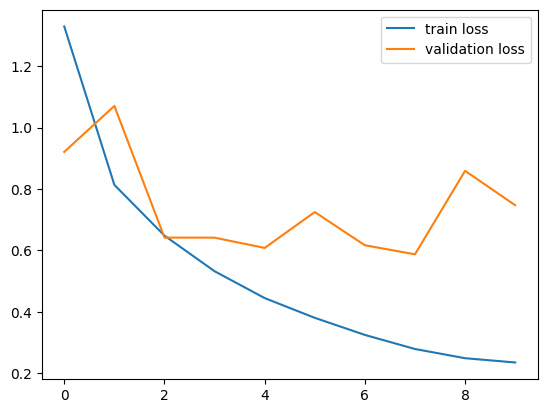

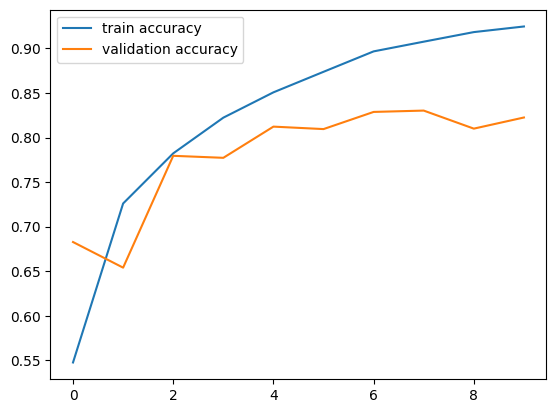

In [62]:
h = history
#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()